In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

# Connect to the SQLite database
db_path = '../database/drone_definitions.db'
conn = sqlite3.connect(db_path)
# conn = sqlite3.connect('your_database.db')

# Execute the query and fetch the results into a DataFrame
query = """
    SELECT model_name, sum_distance
    FROM definitions
    WHERE model_id IN (1, 2, 3, 7, 8) AND counter = 1
"""
df = pd.read_sql_query(query, conn)

# Close the database connection
conn.close()


In [13]:
df['model_name'] = df['model_name'].replace({'chatgpt': 'davinci-002', 'gptturbo': 'gpt3.5'})

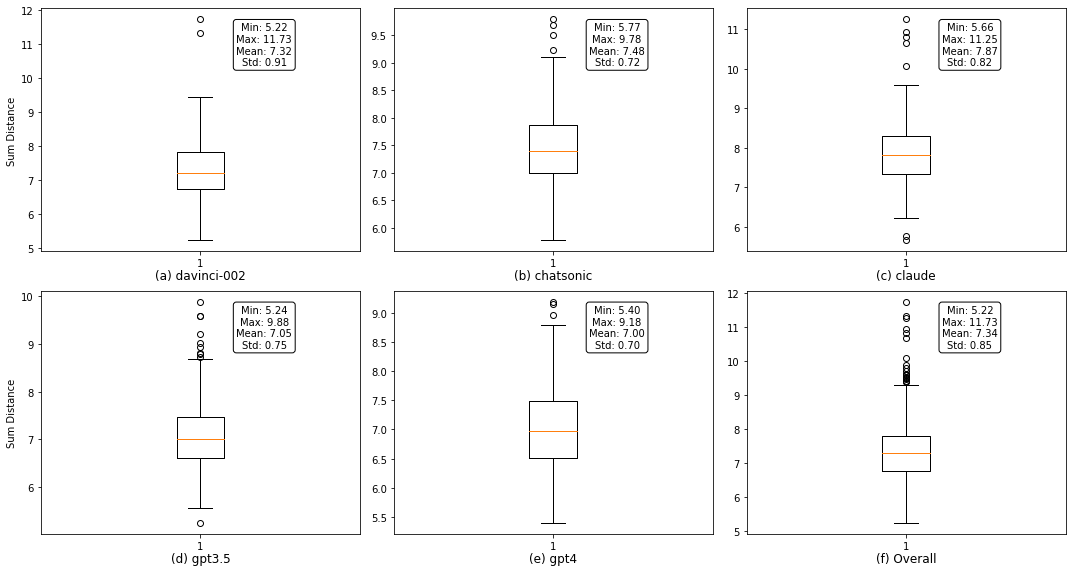

In [28]:
import string
# Set the figure size
plt.figure(figsize=(15, 8))

# # Create a subplot for the grouped boxplots
# plt.subplot(2, 3, (1, 5))

# # Grouped boxplots
# df.boxplot(column='sum_distance', by='model_name', grid=False)
# plt.title('Grouped Boxplots')
# plt.xlabel('Model Name')
# plt.ylabel('Sum Distance')


# Create a subplot for each model_id
for i, model_name in enumerate(df['model_name'].unique(), 1):
    ax = plt.subplot(2, 3, i)
    ax.boxplot(df[df['model_name'] == model_name]['sum_distance'])
    # ax.set_title(f'{model_name}')
    # plt.xlabel('Model Name')
    if i == 1 or i == 4:
        ax.set_ylabel('Sum Distance')
    
    # Calculate statistics for the boxplot
    data = df[df['model_name'] == model_name]['sum_distance']
    min_val = data.min()
    max_val = data.max()
    mean_val = data.mean()
    std_val = data.std()

    # Annotate the subplot with the statistics
    label = f"Min: {min_val:.2f}\nMax: {max_val:.2f}\nMean: {mean_val:.2f}\nStd: {std_val:.2f}"
    ax.annotate(label, xy=(0.7, 0.85), xycoords="axes fraction",
                ha="center", va="center", fontsize=10, bbox=dict(boxstyle="round,pad=0.3", facecolor='white'))

    # Annotate the subplot with the corresponding label "(a)", "(b)", "(c)", etc.
    label = f"({string.ascii_lowercase[i - 1]}) {model_name}"
    ax.annotate(label, xy=(0.5, -0.1), xycoords="axes fraction",
                ha="center", va="center", fontsize=12)

# # Adjust the layout
# plt.tight_layout()

# # Display the plot
# plt.show()

# Create a subplot for the overall boxplot
ax2 = plt.subplot(2, 3, 6)

# Overall boxplot
ax2.boxplot(df['sum_distance'])
data = df['sum_distance']
min_val = data.min()
max_val = data.max()
mean_val = data.mean()
std_val = data.std()
# Annotate the subplot with the statistics
label = f"Min: {min_val:.2f}\nMax: {max_val:.2f}\nMean: {mean_val:.2f}\nStd: {std_val:.2f}"
ax2.annotate(label, xy=(0.7, 0.85), xycoords="axes fraction",
            ha="center", va="center", fontsize=10, bbox=dict(boxstyle="round,pad=0.3", facecolor='white'))
# Annotate the subplot with the corresponding label "(a)", "(b)", "(c)", etc.
label = f"({string.ascii_lowercase[5]}) Overall"
ax2.annotate(label, xy=(0.5, -0.1), xycoords="axes fraction",
            ha="center", va="center", fontsize=12)
# plt.title('Overall Boxplot')
# plt.xlabel('All Models')
# plt.ylabel('Sum Distance')

# Adjust the layout
plt.tight_layout()
plt.savefig('../analysis/visualization/per_model_boxplot.pdf')

# Display the plot
plt.show()